**PARSING A FASTQ AND COMPUTING QUALITY STATISTICS**

**check_fastq.ipynb** 
download fastq from aula.esci.upf (inside reads/unknown_illumina_2024.fastq)


1. Use SeqIO.parse to print the first record in the fastq

2. What's the read length?

3. How many reads are stored in this file?

4. Can you print the quality score? (check https://biopython.org/wiki/SeqRecord)

5. Plot the mean quality at every position in the reads: start with mean quality at position 1 across all reads, then at position 2, and so on until N (that is the length of the reads).

6. Show lines with the mean quality score and the 95% conficence interval (2 s.d.)  

7. Convert the qualities to error probabilities using the Phred Quality Score equations. Plot them, at which positions is higher? what's the expected error rate of them?

8. Practical Assessment: Identify the reads origin. (How would you find out from which genome come these reads? To which species they belong? Please describe the method used and the reliability of the results)


Consulting materials:
https://en.wikipedia.org/wiki/FASTQ_format

https://biopython.org/wiki/SeqIO

https://biopython.org/wiki/SeqRecord

In [1]:
from Bio import SeqIO

1. Use SeqIO.parse to print the first record in the fastq

In [2]:
record = list(SeqIO.parse("example.fastq", "fastq"))

2. What's the read length?

In [3]:
print(f'The length of the read is: {len(record[0].seq)}')

The length of the read is: 151


3. How many reads are stored in this file?

In [4]:
print(f'There are {len(record)} reads.')

There are 10000 reads.


4. Can you print the quality score? (check https://biopython.org/wiki/SeqRecord)

In [5]:
print(record[0].letter_annotations)

{'phred_quality': [2, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 25, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 11, 37, 37, 37, 37, 37, 37]}


5. Plot the mean quality at every position in the reads: start with mean quality at position 1 across all reads, then at position 2, and so on until N (that is the length of the reads).

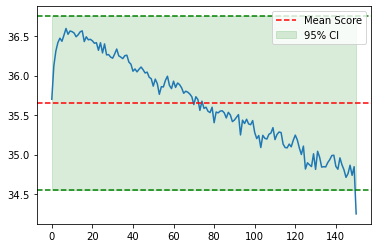

In [6]:
import matplotlib.pyplot as plt
import numpy as np

max_length = max([len(record[num].seq) for num in range(len(record))]) #get maximum length

pos_score = [0 for x in range(max_length)] 

for x in range(len(record)):
    list = [num for num in record[x].letter_annotations['phred_quality']]
    for pos in range(len(record[x])):
        pos_score[pos] += list[pos]/10000

mean = np.mean(pos_score)
sd = np.std(pos_score)
ci = 1.96 * sd

plt.plot(pos_score)
plt.axhline(y=mean, color='red', linestyle='--', label='Mean Score')
plt.axhline(y=mean-ci, color='green', linestyle='--')
plt.axhline(y=mean+ci, color='green', linestyle='--')
plt.fill_between(range(max_length), mean-ci, ci+mean, alpha = 0.15, color = 'g', label = '95% CI')

plt.legend()

7. Convert the qualities to error probabilities using the Phred Quality Score equations. Plot them, at which positions is higher? what's the expected error rate of them?

mean:  0.003000667251991566 sd:  0.0013501553541598577 ci: 0.002646304494153321


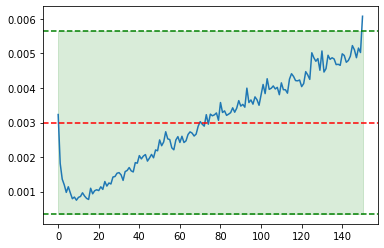

In [7]:
import matplotlib.pyplot as plt
import numpy as np

max_length = max([len(record[num].seq) for num in range(len(record))]) #get maximum length

error_score = [0 for x in range(max_length)] 

for x in range(len(record)):
    list = [num for num in record[x].letter_annotations['phred_quality']]
    for pos in range(len(record[x])):
        error_score[pos] += (10**(list[pos]/-10))/10000

mean = np.mean(error_score)
sd = np.std(error_score)
ci = 1.96 * sd
print('mean: ',mean, 'sd: ',sd, 'ci:',ci)

plt.plot(error_score)
plt.axhline(y=mean, color='red', linestyle='--', label='Mean Score')
plt.axhline(y=mean-ci, color='green', linestyle='--')
plt.axhline(y=mean+ci, color='green', linestyle='--')
plt.fill_between(range(max_length), mean-ci, ci+mean, alpha = 0.15, color = 'g', label = '95% CI')

8. Practical Assessment: Identify the reads origin. (How would you find out from which genome come these reads? To which species they belong? Please describe the method used and the reliability of the results)

In [18]:
#One sample scenario:

#Check maximum quality score.
def get_sample(index, scores, max_score):
    if scores[index] == max_score:
        return index
    return get_sample(index+1, scores, max_score)

sample_position = get_sample(0,pos_score, max(pos_score)) #Get position in fasta record

seq_sample = record[sample_position].seq #Get sequence in that position 
print(max(pos_score))
print(np.mean(record[sample_position].letter_annotations['phred_quality']))
temp_seq_file = "temp_sequence.fasta"
with open(temp_seq_file, "w") as f:
    f.write(f">sequence\n{seq_sample}")

#makeblastdb -in nt.fasta -dbtype nucl -out nt
    
blastn_command = f"blastn -query temp_sequence.fasta -db nt -out blastn_output.xml"
!{blastn_command}

#USE BLAST+ TO NOT DOWNLOAD THE NT DATABASE.


36.59519999999684
36.59602649006622
BLAST Database error: No alias or index file found for nucleotide database [nt] in search path [/Users/eloivilellaescolano/ESCI/ASAB/session2::]


In [26]:
top_10_scores = sorted(pos_score, reverse=True)[:10]

with open("temp_sequence.fasta", "w") as f:
    for top_score in top_10_scores:
        sample_position = get_sample(0, pos_score, top_score)
        seq_sample = record[sample_position].seq
        f.write(f">sequence{top_score}\n{seq_sample}\n")
    # Run blastn
    #blastn_command = f"blastn -query {temp_seq_file} -db nt -remote -out blastn_output_{top_score}.xml"
    #!{blastn_command}
        
    #USE BLAST+ TO NOT DOWNLOAD THE NT DATABASE.

   


35.44998026402351


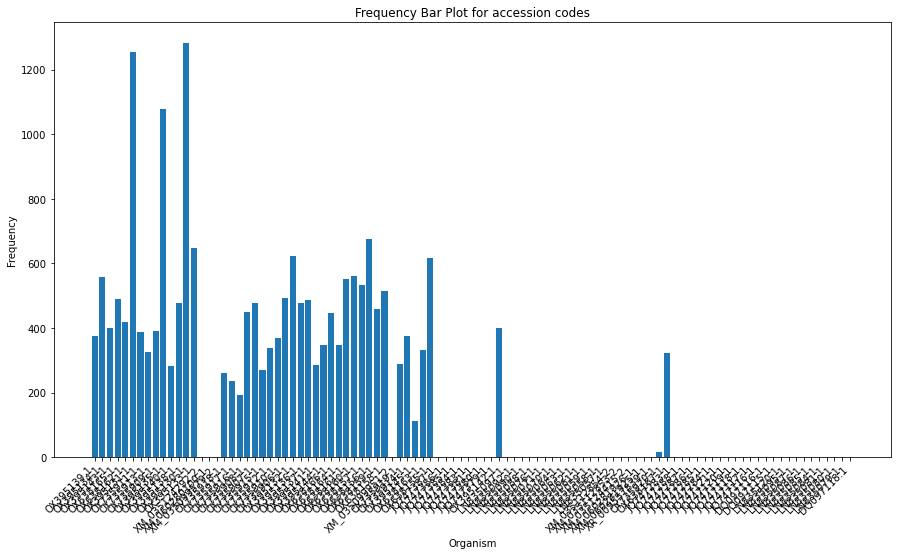

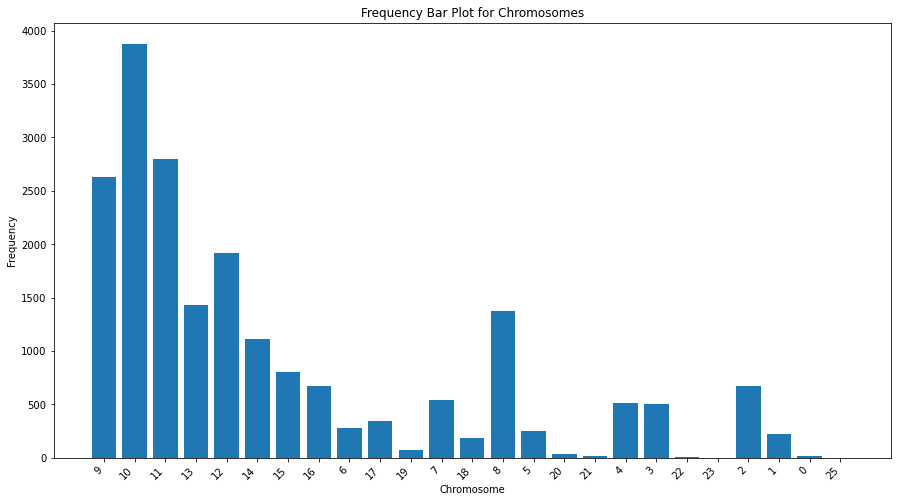

Most probable accession code: OX395130.1, Count: 1282
Most probable chromosome: 10, Count: 3880
We saw that the bast majority of accession codes are from the organism Podarcis lilfordi
The method used uses the blastn output of the 10 top quality reads and creates plots to show the most probable genome of those reads.

 To maximize accuracy we use: 
	Multiple samples
	Maximizing quality 


In [10]:
#We import Blast results to csv and we plot to find an answer
import csv
import matplotlib.pyplot as plt


organism_frequency = {}
chromosome_frequency = {}

with open('UV52MXC1013-Alignment-HitTable.csv', 'r') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    
    next(csv_reader)
    
    for row in csv_reader:
        if row:
            _, organism, _, _, chromosome, _, _, _, _, _, _, _ = row
            
            if organism not in organism_frequency:
                organism_frequency[organism] = 0
            organism_frequency[organism] += 1
            
            if chromosome not in chromosome_frequency:
                chromosome_frequency[chromosome] = 0
            chromosome_frequency[chromosome] += 1

organisms, organism_counts = zip(*organism_frequency.items())
chromosomes, chromosome_counts = zip(*chromosome_frequency.items())

plt.figure(figsize=(15, 8))
plt.bar(organisms, organism_counts)
plt.xlabel('Organism')
plt.ylabel('Frequency')
plt.title('Frequency Bar Plot for accession codes')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(15, 8))
plt.bar(chromosomes, chromosome_counts)
plt.xlabel('Chromosome')
plt.ylabel('Frequency')
plt.title('Frequency Bar Plot for Chromosomes')
plt.xticks(rotation=45, ha='right')
plt.show()

max_accs = max(organism_frequency, key=organism_frequency.get)
max_accs_count = organism_frequency[max_accs]

max_chromosome = max(chromosome_frequency, key=chromosome_frequency.get)
max_chromosome_count = chromosome_frequency[max_chromosome]

print(f"Most probable accession code: {max_accs}, Count: {max_accs_count}")
print(f"Most probable chromosome: {max_chromosome}, Count: {max_chromosome_count}")

print(f'We saw that the bast majority of accession codes are from the organism Podarcis lilfordi\nThe method used uses the blastn output of the 10 top quality reads and creates plots to show the most probable genome of those reads.\n\n To maximize accuracy we use: \n\tMultiple samples\n\tMaximizing quality ')
